In [1]:
import pandas as pd

In [3]:
df=pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

<AxesSubplot:>

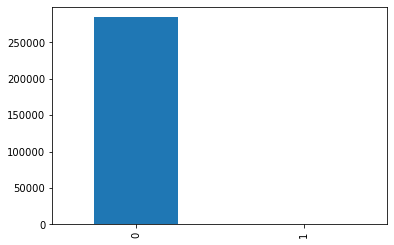

In [5]:
pd.value_counts(df['Class']).plot.bar()

### We Will Create an ANN and solve this problem(ROC AUC) 


In [10]:
len(df.columns)

31

In [12]:
# Just Remove the Time column 

X=df.iloc[:,1:30]
y=df.iloc[:,-1]

In [14]:
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [16]:
y_train.value_counts()

0    199008
1       356
Name: Class, dtype: int64

In [17]:

import tensorflow
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [18]:
print(len(X.columns))
n_inputs=29 #as no. of features is 29


29


In [19]:
# define model
model = Sequential()
model.add(Dense(50, input_dim=n_inputs, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')
model.fit(X_train,y_train,epochs=10)

Epoch 1/10
6231/6231 [==============================] - 3s 483us/step - loss: 0.0255
Epoch 2/10
6231/6231 [==============================] - 3s 462us/step - loss: 0.0168
Epoch 3/10
6231/6231 [==============================] - 3s 489us/step - loss: 0.0115
Epoch 4/10
6231/6231 [==============================] - 3s 448us/step - loss: 0.0160
Epoch 5/10
6231/6231 [==============================] - 3s 458us/step - loss: 0.0126
Epoch 6/10
6231/6231 [==============================] - 3s 541us/step - loss: 0.0110
Epoch 7/10
6231/6231 [==============================] - 3s 485us/step - loss: 0.0136
Epoch 8/10
6231/6231 [==============================] - 3s 507us/step - loss: 0.0112
Epoch 9/10
6231/6231 [==============================] - 3s 518us/step - loss: 0.0086
Epoch 10/10
6231/6231 [==============================] - 4s 648us/step - loss: 0.0085


In [21]:
from sklearn.metrics import roc_auc_score
y_pred1=model.predict(X_test)

print(roc_auc_score(y_test,y_pred1))

0.9595001254982868


### Weighted Neural Network With Keras
We'll first Define Weights and then fit the model with those specific weights

In [23]:
print(y_train.value_counts())


0    199008
1       356
Name: Class, dtype: int64


In [27]:
# 0's are much bigger(560 times) in number compared to 1's,
# so similarly we'll apply the weight to 1's so that we can neutrallise the effect

weights_assigned={0:1,1:560}

In [28]:
# define weighted model
model = Sequential()
model.add(Dense(50, input_dim=n_inputs, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')
model.fit(X_train,y_train,class_weight=weights_assigned,epochs=10)

Epoch 1/10
6231/6231 [==============================] - 3s 489us/step - loss: 2.7680
Epoch 2/10
6231/6231 [==============================] - 3s 549us/step - loss: 1.7381
Epoch 3/10
6231/6231 [==============================] - 3s 539us/step - loss: 2.0126
Epoch 4/10
6231/6231 [==============================] - 3s 548us/step - loss: 1.6018
Epoch 5/10
6231/6231 [==============================] - 3s 548us/step - loss: 1.8269
Epoch 6/10
6231/6231 [==============================] - 3s 526us/step - loss: 2.0673
Epoch 7/10
6231/6231 [==============================] - 3s 497us/step - loss: 2.7137
Epoch 8/10
6231/6231 [==============================] - 3s 497us/step - loss: 2.3162
Epoch 9/10
6231/6231 [==============================] - 3s 455us/step - loss: 2.9267
Epoch 10/10
6231/6231 [==============================] - 3s 546us/step - loss: 1.7512


In [29]:
from sklearn.metrics import roc_auc_score
y_pred=model.predict(X_test)

print(roc_auc_score(y_test,y_pred))

0.9689214180754768
